In [1]:
import sys, os
import numpy as np
from tqdm import tqdm
import glob

import matplotlib.pyplot as plt
import tikzplotlib

working_path = os.path.join(os.path.dirname(os.getcwd()), '')
parent_path = os.path.join(os.path.dirname(os.path.dirname(os.getcwd())), '')

sys.path.append(working_path)
sys.path.append(parent_path)

In [2]:
STLSTM_t32_d32_file = "/home/roland/Projekte/Tests/FromSurface2DepthKedro/data/05_validation/regimeB/exp2/STLSTM_t32_d32_Y_test_00.npy"
STLSTM_t32_d32 = np.load(STLSTM_t32_d32_file)

In [5]:
def getDictFromDT(dt=2):
    if dt>1:
        mae_file_path = "/home/roland/Projekte/Tests/FromSurface2DepthKedro/data/05_validation/regimeB/exp4"
        files_prefix = f"STLSTM_t_0_{dt}"
    else:
        mae_file_path = "/home/roland/Projekte/Tests/FromSurface2DepthKedro/data/05_validation/regimeB/exp3"
        files_prefix = f"STLSTM_t32_d"
        
    files = glob.glob(os.path.join(mae_file_path, files_prefix + "*"))

    MAE = dict()
    for file in files:
        basename = os.path.basename(file)
        MAE[basename] = np.load(file)[0]
        
    return MAE

def fromDict2Point(number, MAE):
    for key, values in MAE.items():
        if f"d_{number}_" in key:
            return MAE[key]
    return None

def getSeries(dt):
    MAE = getDictFromDT(dt=dt)
    series = np.array([fromDict2Point(num, MAE) for num in range(32)])
    return series

In [7]:
series = [getSeries(dt) for dt in [1,2,3]]
series

[array([0.013739127, 0.01634865, 0.014824774, 0.1873198, 0.022650605,
        0.026764845, 0.03210528, 0.25636694, 0.045662243, 0.0599954,
        0.07403217, 0.07701561, None, 0.11287365, 0.12554169, None,
        0.17153488, 0.18679018, 0.21250062, None, 0.27158257, 0.27369112,
        0.30565667, None, 0.34416214, 0.35679343, 0.35964203, None,
        0.36697808, None, 0.36310425, None], dtype=object),
 array([0.011985563, None, None, None, 0.020010052, None, None, None,
        0.036740035, None, None, None, 0.08357636, None, None, None,
        0.13493924, None, None, None, 0.22422306, None, None, None,
        0.28864372, None, None, None, 0.33371928, None, None, None],
       dtype=object),
 array([0.0064688437, None, None, None, 0.011678492, None, None, None,
        0.036378928, None, None, None, 0.07669116, None, None, None,
        0.1479886, None, None, None, 0.22520769, None, None, None,
        0.29348475, None, None, None, 0.33358046, None, None, None],
       dtype=obje

<IPython.core.display.Javascript object>


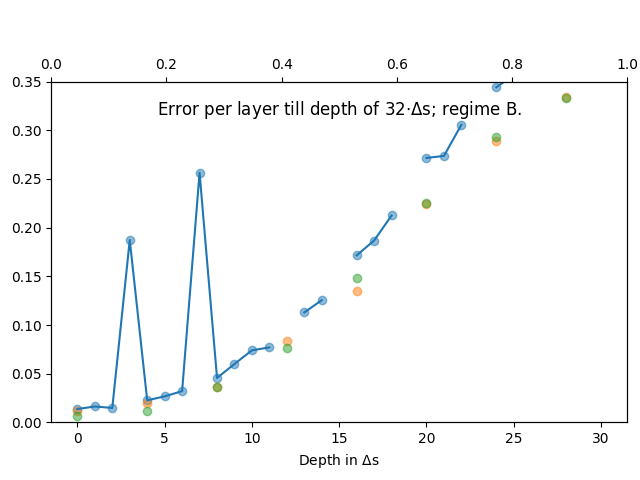

In [12]:
%matplotlib notebook

fig = plt.figure()
ax1 = fig.add_subplot(111)
plt.subplots_adjust(left=0.08, right=0.98, top=0.83, bottom=0.12)

ax2 = ax1.twiny()

for i, s in enumerate(series):
    ax1.scatter(range(32),s, label=i+1, alpha=0.5)
    ax1.plot(range(32),s)
    #ax1.plot(STLSTM_t32_d32)

ax1.set_ylim([0,0.35])
ax1.set_xlabel("Depth in $\Delta$s")

#ax1.scatter(range(32), STLSTM_t32_d32)

plt.rcParams['axes.titley'] = 1.0    # y is in axes-relative coordinates.
plt.rcParams['axes.titlepad'] = -24  # pad is in points...

plt.title("Error per layer till depth of 32$\cdot\Delta$s; regime B.")

tikzplotlib.save("test.tex")